<a href="https://colab.research.google.com/github/lee-seong-wook/Non-Maximum-Suppression/blob/main/NMS_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선택된 박스 인덱스: [0, 1]
선택된 박스 좌표: [[30 20 80 70]
 [40 30 90 80]]


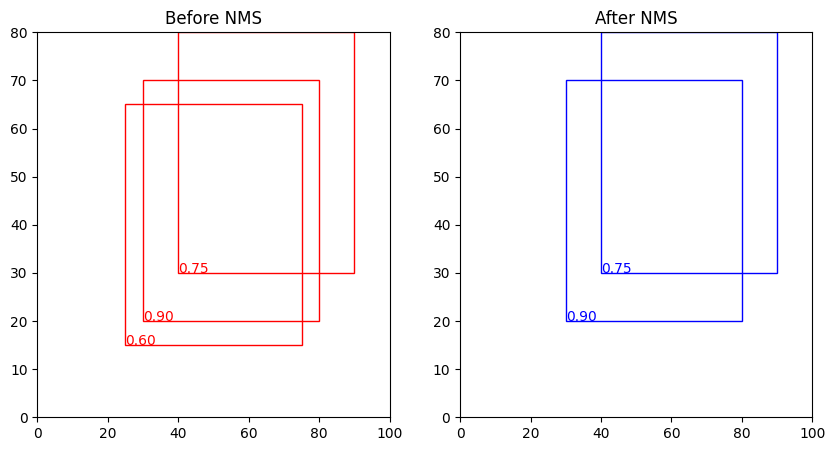

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def non_max_suppression(boxes, scores, iou_threshold):
    # 박스의 넓이 계산
    areas = (boxes[:, 2] - boxes[:, 0] + 1) * (boxes[:, 3] - boxes[:, 1] + 1)

    # 점수에 따라 박스 정렬 (높은 점수부터)
    order = np.argsort(scores)[::-1]

    # 최종 선택된 박스의 인덱스 리스트
    selected_boxes = []

    while order.size > 0:
        # 가장 높은 점수를 갖는 박스 선택
        index = order[0]
        selected_boxes.append(index)

        # 선택된 박스와의 IoU를 계산
        x1 = np.maximum(boxes[index, 0], boxes[order[1:], 0])
        y1 = np.maximum(boxes[index, 1], boxes[order[1:], 1])
        x2 = np.minimum(boxes[index, 2], boxes[order[1:], 2])
        y2 = np.minimum(boxes[index, 3], boxes[order[1:], 3])

        # 겹치는 영역 계산
        intersection = np.maximum(0.0, x2 - x1 + 1) * np.maximum(0.0, y2 - y1 + 1)

        # IoU 계산
        iou = intersection / (areas[index] + areas[order[1:]] - intersection)

        # IoU가 임계값보다 작은 박스들만 남기기
        inds = np.where(iou <= iou_threshold)[0]
        order = order[inds + 1]

    return selected_boxes

boxes = np.array([[30, 20, 80, 70], [40, 30, 90, 80], [25, 15, 75, 65]])
scores = np.array([0.9, 0.75, 0.6])
iou_threshold = 0.5

selected_indices = non_max_suppression(boxes, scores, iou_threshold)
selected_boxes = boxes[selected_indices]

print("선택된 박스 인덱스:", selected_indices)
print("선택된 박스 좌표:", selected_boxes)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# NMS 이전의 바운딩 박스 시각화
for box, score in zip(boxes, scores):
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                             linewidth=1, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)
    ax[0].text(box[0], box[1], f'{score:.2f}', color='r')

ax[0].set_title('Before NMS')
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 80)

# NMS 이후의 바운딩 박스 시각화
for box, score in zip(selected_boxes, scores[selected_indices]):
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                             linewidth=1, edgecolor='b', facecolor='none')
    ax[1].add_patch(rect)
    ax[1].text(box[0], box[1], f'{score:.2f}', color='b')

ax[1].set_title('After NMS')
ax[1].set_xlim(0, 100)
ax[1].set_ylim(0, 80)

plt.show()
# 이처럼 nms는 object detection model에서 겹치는 bounding box를 제거하여 최종결과를 정리하는 기술
